# Proprocessing and Data Analysis

## Objective

As part of my 5th semester project, 49985 songs have been classified with a list of genres pertaining to the artist of the particular song. For each song and their artist(s) there exists some meta data. The objective is to classify the correct genre(s) of each song based on their lyrics since crawling the lyrics of those songs was a big task in the project. More meta data exists for the particular song (Spotify API and additional data from the project) that can be used for improving classification. This meta data will not be included in the classification in the first step. 

## Genre List

For every song there exists a list of genre that actually pertains to the artist of that genre. If there are more than one artists, only the genre of the first artist is included. To simplify classification (multi-label or single-label), we focus on the most common word in the genre list which in the example ['emo rock', 'progressive rock', 'metal'] would be 'rock'. The genre of that 'song' (actually the artist) would then be 'rock'. Spotify doesn't provide genre specific to one song, so we have to go from there. Some genre lists only have one element in the form of ['pop rock']. In that case the last word will be chosen. Some of the genre lists have ambiguous most common words. For example ['esoteric house', 'esoteric pop', 'alternative pop']. Here 'esoteric' will be chosen, since it's the most common word. The counter might choose 'esoteric' over 'pop' since it's the first occurence in the list or maybe because it's ordered by alphabet. The counter is taken from ollections.Counter. The 10 most common genres will then be used to build the train / test split. The same can be done on the 5, 25 or 50 most common genres, but for simplicity we focus on the 10 most common genres.

In [44]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import os

# Set up data directory and paths
data_dir = '../data'
train_file = 'train_data.csv'
test_file = 'test_data.csv'
df_dir = 'english_lyrics_some_with_genres.csv'

In [2]:
# Read the CSV file into a pandas DataFrame
df = pd.read_csv(os.path.join(data_dir, df_dir))

df = df[df.genres_list.isna() == False]

In [3]:
df

,Unnamed: 0,id,lyrics,is_english,genres_list,popularity,release_date,artist_id,artist_name,artist_popularity,artist_followers,artist_picture_url
2,2,7GX5flRQZVHRAGd6B4TmDO,are you alright i m alright i m quite alright ...,True,"['melodic rap', 'philly rap', 'rap', 'trap']",82.0,2017-08-25,4O15NlyKLIASxsJ0PrXPfz,Lil Uzi Vert,87.0,14263609.0,"[{'height': 640, 'url': 'https://i.scdn.co/ima..."
6,6,50YQFbfIVk2XMnVFKAuuib,we pick up in new york city i m tryna find a m...,True,"['neo mellow', 'singer-songwriter']",48.0,2012-05-18,0hEurMDQu99nJRq8pTxO14,John Mayer,78.0,5712121.0,"[{'height': 640, 'url': 'https://i.scdn.co/ima..."
24,24,0i5el041vd6nxrGEU8QRxy,baby you a song you make me wanna roll my wind...,True,"['contemporary country', 'country', 'country p...",70.0,2012-01-01,3b8QkneNDz4JHKKKlLgYZg,Florida Georgia Line,75.0,5035580.0,"[{'height': 640, 'url': 'https://i.scdn.co/ima..."
26,26,5kNe7PE09d6Kvw5pAsx23n,baby last night was hands down one of the best...,True,"['contemporary country', 'country', 'country r...",73.0,2015-01-01,6x2LnllRG5uGarZMsD4iO8,Thomas Rhett,74.0,4334369.0,"[{'height': 640, 'url': 'https://i.scdn.co/ima..."
30,30,1B8RSIxmwcjad7XUJjeCK2,you make me feel so young you make me feel as ...,True,"['adult standards', 'canadian pop', 'jazz pop'...",54.0,2013-04-11,1GxkXlMwML1oSg5eLPiAz3,Michael Bublé,89.0,5594379.0,"[{'height': 640, 'url': 'https://i.scdn.co/ima..."
...,...,...,...,...,...,...,...,...,...,...,...,...
480814,480923,2QNLwzLyqguTFVCL8KxFsB,doctor captain t o vess r v steadfast bearing ...,True,"['horror punk', 'vancouver punk']",10.0,2007-01-01,4fOLLJNNh7h9Yk3BQL5Lnd,The Darkest of The Hillside Thickets,19.0,4701.0,"[{'height': 640, 'url': 'https://i.scdn.co/ima..."
480816,480925,5Phnz8K1PB84HfaA5pRwtz,congregation settle in your seats the reverend...,True,"['comic', 'nerdcore']",23.0,2007-01-01,0tRxVqFSJrai3XTMOiEHVn,MC Frontalot,28.0,25761.0,"[{'height': 640, 'url': 'https://i.scdn.co/ima..."
480820,480929,0JqmQjGr8OUHsoqjo4a84I,i got bitten by a radioactive bug i tried an e...,True,"['geek folk', 'geek rock']",4.0,1998,3NDauyMAOtURa3A0abWkW1,Ookla The Mok,7.0,1556.0,"[{'height': 640, 'url': 'https://i.scdn.co/ima..."
480833,480942,5zIV4B3PmT36wxFwFFqIdw,wake up in the morning a suicidal warning pull...,True,['reggae rock'],6.0,2006-01-02,6hcCT16w7mizY5nbwKXP7u,Bag of Toys,26.0,9760.0,"[{'height': 640, 'url': 'https://i.scdn.co/ima..."


In [48]:
df_genres_listed = df.copy()
df_genres_listed.genres_list = df_genres_listed.genres_list.apply(lambda x: x.replace('[', '').replace(']', '').split(','))
# Create a new DataFrame with each genre in a separate row
df_exploded = df_genres_listed.explode('genres_list')

# Group the DataFrame by artist and count the number of unique genres per artist
grouped = df_exploded.groupby('id')['genres_list'].nunique()

# Calculate the minimum and maximum number of genres per artist
min_genres = grouped.min()
max_genres = grouped.max()

# Print the results
print(f"The minimum number of genres per artist is {min_genres}")
print(f"The maximum number of genres per artist is {max_genres}")

The minimum number of genres per artist is 1
The maximum number of genres per artist is 18


In [5]:
from collections import Counter
import ast

# Example list of genres
genre_list = df.iloc[1].genres_list
print(genre_list)
genre_list = genre_list.replace(" ", "', '").replace("',', '", "',")
genre_list = ast.literal_eval(genre_list)

# Count the frequency of each word in the list
word_counts = Counter(genre_list)

# Get the most common word and its count
most_common_word, count = word_counts.most_common(1)[0]

# Print the result
print(f"The most frequent word in the genre list is '{most_common_word}' with a count of {count}")

['neo mellow', 'singer-songwriter']
The most frequent word in the genre list is 'neo' with a count of 1


In [6]:
df.shape[0]

49985

In [9]:
import warnings
warnings.filterwarnings("ignore")
from collections import Counter
import ast
import tqdm
from tqdm import tqdm
processed_df = pd.DataFrame(columns=['id', 'lyrics', 'artist_name', 'most_common_genre'])

# Iterate over each row in the DataFrame
for index, row in tqdm(df.iterrows(), total=df.shape[0]):
    # Example list of genres
    df_genre_list = row.genres_list
    if "Unknown genre" in df_genre_list:
        #print("Skipping index: " + str(index) + " because it contains 'Unknown genre'")
        continue
        
    genre_list = df_genre_list.replace(" ", "', '").replace("',', '", "',")
    genre_list = ast.literal_eval(genre_list)
    
    if len(genre_list) == 2:
        most_common_word = genre_list[-1]
    else:
        # Count the frequency of each word in the list
        word_counts = Counter(genre_list)

        # Get the most common word and its count
        most_common_word, count = word_counts.most_common(1)[0]
    
    # Assign the most common word to the 'most_common_genre' column of the current row
    df.at[index, 'most_common_genre'] = most_common_word
    
    processed_df = processed_df.append({'id': row.id, 'lyrics': row.lyrics, 'artist_name': row.artist_name, 'most_common_genre': most_common_word, 'genre_list': genre_list}, ignore_index=True)

100%|██████████| 49985/49985 [03:36<00:00, 231.14it/s]


In [65]:
from concurrent.futures import ThreadPoolExecutor
from concurrent.futures import as_completed
from concurrent.futures import TimeoutError
from collections import Counter
import ast
import tqdm

# Define a function to process a single row of the DataFrame
def process_row(row):
    # Example list of genres
    df_genre_list = row.genres_list
    if "Unknown genre" in df_genre_list:
        #print("Skipping index: " + str(index) + " because it contains 'Unknown genre'")
        return None
        
    genre_list = df_genre_list.replace("hip hop", "hip-hop").replace(" ", "', '").replace("',', '", "',")
    genre_list = ast.literal_eval(genre_list)
    
    if len(genre_list) == 2:
        most_common_word = genre_list[-1]
    else:
        # Count the frequency of each word in the list
        word_counts = Counter(genre_list)

        # Get the most common word and its count
        most_common_word, count = word_counts.most_common(1)[0]
    
    # Return a dictionary with the row data and the most common word
    return {'id': row.id, 'lyrics': row.lyrics, 'artist_name': row.artist_name, 'most_common_genre': most_common_word, 'genre_list': genre_list}

processed_rows = []
with ThreadPoolExecutor() as executor:
    # Submit each row to the executor to be processed
    futures_ = [executor.submit(process_row, row) for _, row in df.iterrows()]

    # Iterate over the completed futures and append the processed row to the processed_df DataFrame
    for future_ in as_completed(futures_):
        result = future_.result()
        if result is not None:
            processed_rows.append(result)

In [66]:
processed_df = pd.DataFrame(processed_rows)

In [67]:
processed_df

,id,lyrics,artist_name,most_common_genre,genre_list
0,4QLI9UOwuch1rvIkVQ7bLv,in the early morning rain with a dollar in my ...,Elvis Presley,rockabilly,"[rock-and-roll, rockabilly]"
1,1Nc2PslSlR4cmAd01so5xi,get out of the green travelling to berlin what...,Ruede Hagelstein,german,"[german, house, german, techno, minimal, techno]"
2,4MBSXegfvHPq6N4Ym4kqtC,much as you blame yourself you can t be blamed...,Jason Chen,pop,"[post-teen, pop, viral, pop]"
3,3610MVydPIm5E2lOU0YCPV,holiday sunshine easing chairs blunt wine phot...,John Paul White,indie,"[alabama, indie]"
4,0ZZsfQNJxyQ8AfKQnTDu4C,i don t have all the answers i don t pretend t...,Beth Ditto,electropop,[electropop]
...,...,...,...,...,...
45628,0YXIq7HLhkwamwHFMT52Le,looking for an exit in this world of fear i ca...,Christina Perri,pop,"[dance, pop, neo, mellow, pop, pop, rock, post..."
45629,5r2YCseiUBMuIZcVkThoSC,well i ve got open eyes and an open door but i...,Passenger,folk-pop,"[folk-pop, neo, mellow]"
45630,5MDqYMdZTskxhC6zqCDEbx,that howling wind it comes knocking on her doo...,Patrick Park,pop,"[acoustic, pop]"
45631,2RvE6carc2iLZ5oVUxaTyH,cold nights and colder hearts we ve been sinki...,I Killed The Prom Queen,metalcore,"[deathcore, melodic, metalcore, metalcore, scr..."


In [68]:
#find unique points values
points = processed_df.most_common_genre.unique()

#sort values smallest to largest
points.sort()

#display sorted values
points

array([", children's', 'music", ', vbs', '21st', '5th', '6', 'a',
       'abstract', 'abstractro', 'acoustic', 'adelaide', 'adult',
       'adventista', 'advocacy', 'african', 'afro', 'afro-funk',
       'afrobeat', 'afrofuturism', 'afropop', 'afroswing', 'age',
       'aggrotech', 'ai', 'alabama', 'alaska', 'albany', 'album',
       'albuquerque', 'alt', 'alte', 'alternative', 'ambeat', 'ambient',
       'american', 'americana', 'anarcho-punk', 'and', 'anglican',
       'anime', 'ann', 'anthem', 'anthem-folk', 'anti-folk', 'antiviral',
       'arab', 'arizona', 'arkansas', 'art', 'asbury', 'asian', 'athens',
       'atl', 'atlanta', 'atmospheric', 'auckland', 'aussietronica',
       'austin', 'austindie', 'australian',
       "australian', 'children's', 'music", 'austrian', 'austropop',
       'autoharp', 'avant-garde', 'azeri', 'azonto', 'azontobeats',
       'bachata', 'bakersfield', 'balearic', 'balkan', 'ballroom',
       'baltimore', 'band', 'banda', 'banjo', 'bap', 'barbadian',


In [69]:
#get 5 most common genres and create train/test out of that
print(processed_df['most_common_genre'].value_counts().nlargest(10))
five_most_common_genres = processed_df['most_common_genre'].value_counts().nlargest(10).index.tolist()

rock         5634
pop          4645
indie        2444
country      2176
hip-hop      2053
metal        1940
rap          1650
christian    1269
punk         1082
soul          922
Name: most_common_genre, dtype: int64


In [70]:
most_common_genres_series = processed_df['most_common_genre'].value_counts().nlargest(10)

<Axes: title={'center': 'Most Common Genres (Total Data)'}>

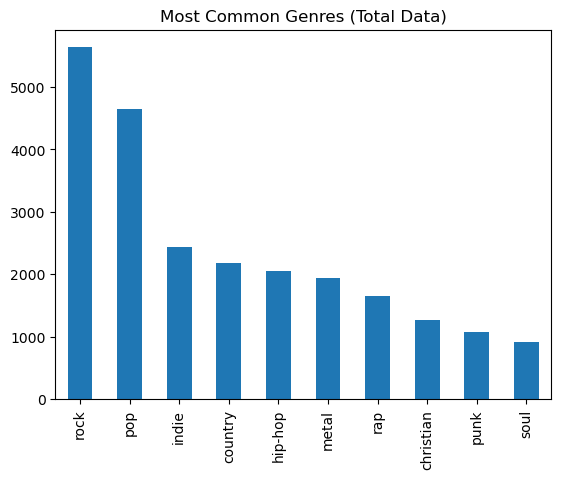

In [71]:
most_common_genres_series.plot(kind='bar', title='Most Common Genres (Total Data)')

In [72]:
only_five_most_common_genres = processed_df[processed_df['most_common_genre'].isin(five_most_common_genres)]

In [73]:
train_file = 'train_data.csv'
test_file = 'test_data.csv'

# Split the data into train and test sets
train_data, test_data = train_test_split(only_five_most_common_genres, test_size=0.2, random_state=42)

# Save the data in designated directory
train_data.to_csv(os.path.join(data_dir, train_file), index=False)
test_data.to_csv(os.path.join(data_dir, test_file), index=False)

In [74]:
train_data

,id,lyrics,artist_name,most_common_genre,genre_list
36171,1FAmKoufyAXMfzPPs9bsjA,i tied my bandana took my pack from the floor ...,Waylon Jennings,country,"[country, country, rock, outlaw, country, texa..."
37780,3QvPEv8XjHa73iYhaienWw,i want to live on the moon never see a human a...,Phantom Planet,rock,"[pop, rock]"
41575,5VPFATm85G3P04Q5g8yxqr,bitch you know you can t parallel park anyway ...,Isaiah Rashad,hip-hop,"[hip-hop, rap, tennessee, hip-hop, underground..."
31423,7J2jCftItt7htcOUdcMnpt,graceless falling slipping in the cold with no...,Matt Pond PA,indie,"[philly, indie]"
25424,4cBPzVIbDIQx0LIyauFAy0,madame morse estate stood five hundred years p...,Ariel Pink,pop,"[art, pop, chillwave, dream, pop, experimental..."
...,...,...,...,...,...
41418,3hqBFb0MF99T428y4IWutw,waaaaaaannnnnhhhh yeah wazzamp it s the choppe...,B.G.,rap,"[deep, southern, trap, dirty, south, rap, gang..."
10324,4k4EJj8J8mhBBTMwPO6htJ,no angel or demon will help me on my knees no ...,Witchcraft,metal,"[doom, metal, gaian, doom, psychedelic, doom, ..."
1670,4woLGsyKHRHfr7tpN7fzgK,this much delight fills columns to new heights...,The Joy Formidable,indie,"[indie, rock, metropopolis, nu, gaze, welsh, i..."
30261,5hZPe0IeNAJjeVx9TzBaDT,the light in the window is a crack in the sky ...,Black Label Society,metal,"[alternative, metal, groove, metal, hard, rock..."


<Axes: title={'center': 'Most Common Genres (Total Data)'}>

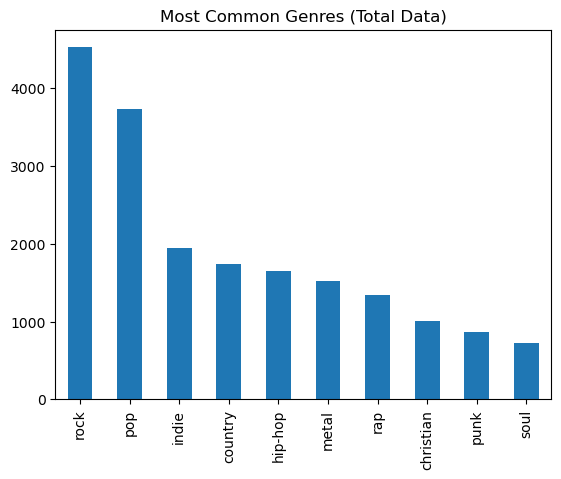

In [75]:
train_data.most_common_genre.value_counts().plot(kind='bar', title='Most Common Genres (Total Data)')

<Axes: title={'center': 'Most Common Genres (Total Data)'}>

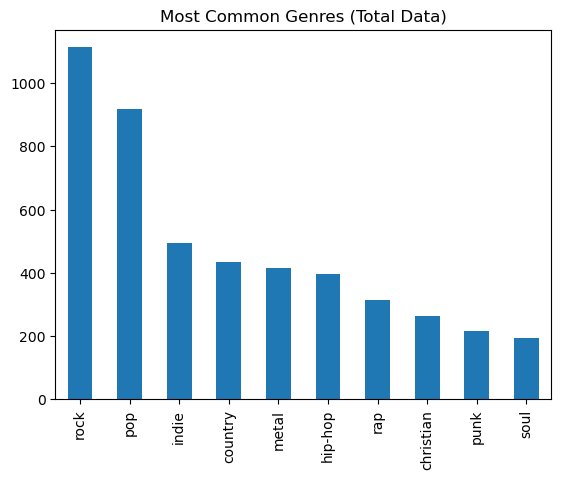

In [76]:
test_data.most_common_genre.value_counts().plot(kind='bar', title='Most Common Genres (Total Data)')

### Most 10 common genres have been added to train / test but what else could be the label?

Plot most common genres sorted by number of occurences. Models can be trained on the 5, 10, 25, 50 most common genres but the train / test data would be scarce since we assume using lyrics as input doesn't yield too much information on a lot of these genres as there is a lot of overlap. We could include another data source and use some artist or song meta data to improve classification.

In [78]:
print(processed_df['most_common_genre'].value_counts().nlargest(50))

rock                 5634
pop                  4645
indie                2444
country              2176
hip-hop              2053
metal                1940
rap                  1650
christian            1269
punk                 1082
soul                  922
adult                 757
alternative           727
emo                   642
jazz                  576
contemporary          565
metalcore             524
new                   504
blues                 474
folk                  453
reggae                428
canadian              420
australian            373
worship               365
house                 362
gospel                320
acoustic              315
r&b                   309
dance                 296
modern                279
deep                  261
hardcore              244
neo                   196
dancehall             183
bluegrass             178
electropop            178
funk                  176
americana             174
deathcore             154
trap        

In [80]:
words=list([tj for tk in only_five_most_common_genres.lyrics for tj in tk.split()])
len(words)

6990001

In [81]:
unique_words = set(words)
len(unique_words)

63541

In [83]:
print(len(train_data), len(test_data))

19052 4763
